# K-Means Clustering on Heart Disease Dataset

This notebook demonstrates K-Means Clustering on selected continuous features of the heart disease dataset to understand the clustering behavior and identify significant variables.

### Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Step 2: Load the Dataset

In [2]:
db = pd.read_csv("/Users/rishanvaratheeswaran/Downloads/COCALC Archive/BINF5000COCALC/Assignment 3/heart.csv")
db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 3: Select Continuous Features
Including categorical variables will skew the clustering, therefore an analysis will only be run on continuous variables.

In [3]:
# Select continuous features for clustering
X = db[['age', 'trestbps', 'chol', 'thalach']]
X.head()

,age,trestbps,chol,thalach
0,52,125,212,168
1,53,140,203,155
2,70,145,174,125
3,61,148,203,161
4,62,138,294,106


### Step 4: Standardize the Features

Standardizing features ensures that each feature contributes equally to the distance calculations in K-Means clustering.

In [4]:
# Standardize the features
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198],
       [ 0.72407944,  0.93603681, -0.83386117,  0.51689988],
       [ 0.834359  ,  0.36487493,  0.93082177, -1.87497657]])

### Step 5: Apply K-Means Clustering

We use K-Means to cluster the data into 2 clusters. This number is chosen to represent the presence/absence of heart disease.

In [5]:
# Define the number of clusters
k = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster Labels:\n", cluster_labels)
print("Cluster Centers:\n", cluster_centers)


Cluster Labels:
 [1 1 0 ... 1 1 0]
Cluster Centers:
 [[ 0.7095347   0.42581385  0.27217681 -0.55259591]
 [-0.69718303 -0.41840123 -0.26743872  0.54297626]]


### Step 6: Visualize the Clusters

We visualize the clusters by plotting the scaled features against each other. This helps in understanding how the clusters are formed based on the features.

##### Age vs. Resting Blood Pressure

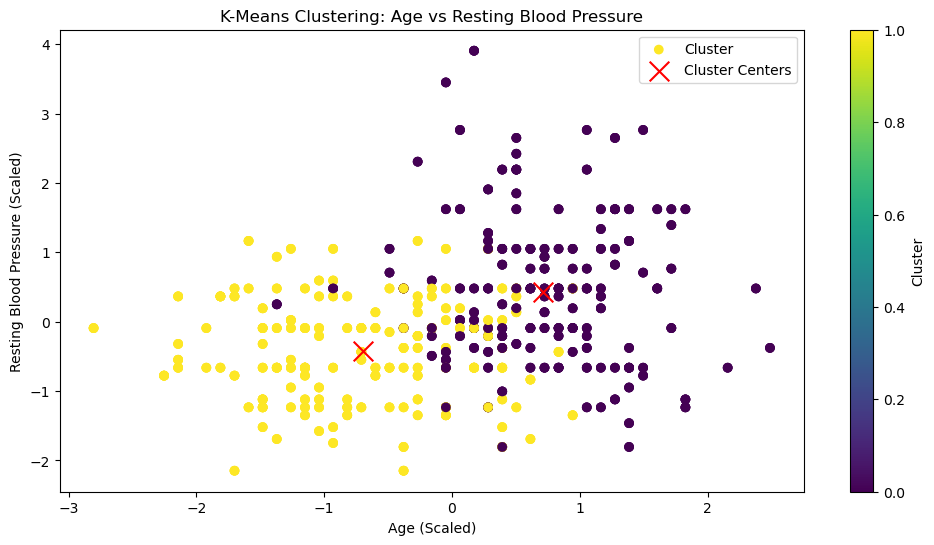

In [6]:
# Plot Age vs. Resting Blood Pressure
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Age (Scaled)')
plt.ylabel('Resting Blood Pressure (Scaled)')
plt.title('K-Means Clustering: Age vs Resting Blood Pressure')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

#The clusters are well separated by these variables, meaning one of them has to be driving the variation 

#### Age vs. Resting Blood Pressure

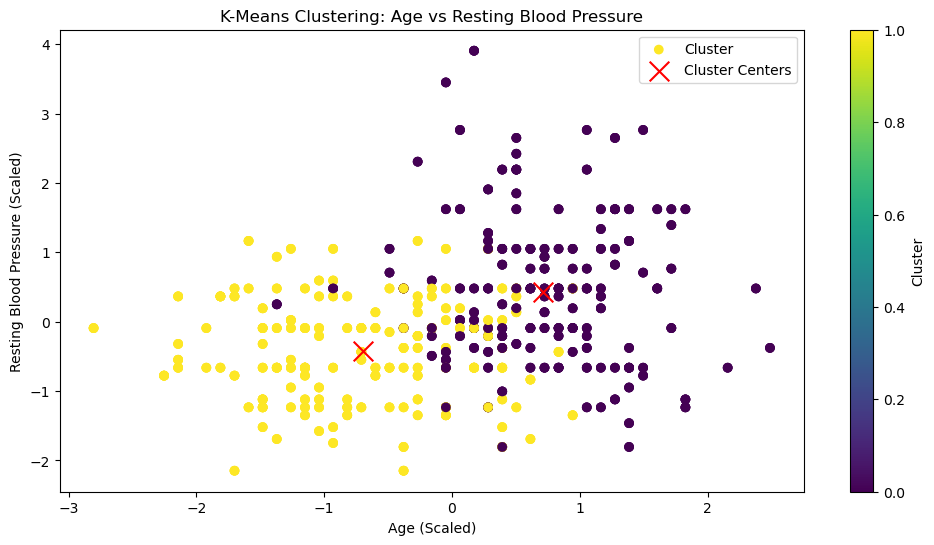

In [7]:
# Plot Age vs. Resting Blood Pressure
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Age (Scaled)')
plt.ylabel('Resting Blood Pressure (Scaled)')
plt.title('K-Means Clustering: Age vs Resting Blood Pressure')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

#Once again, clusters are well defined here, lets keep an eye on Age

#### Age vs. Maximum Heart Rate Achieved

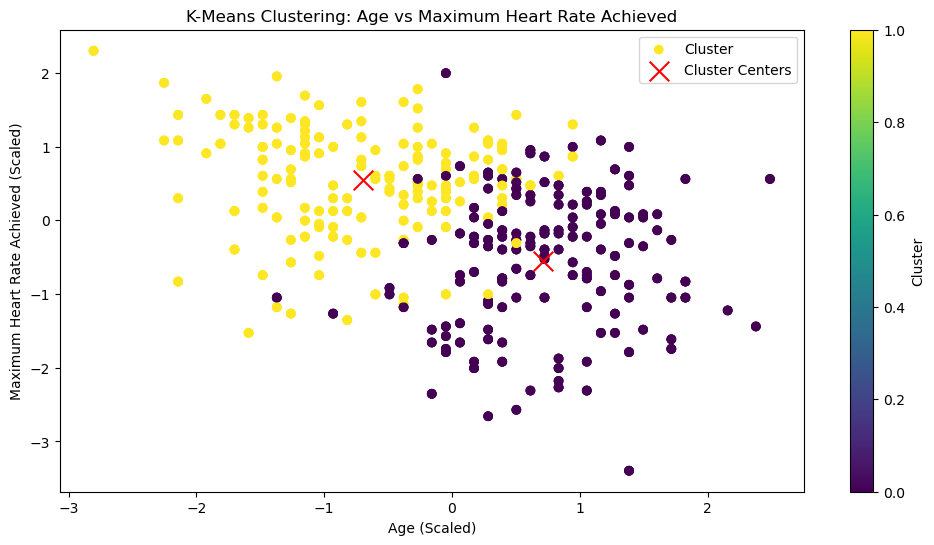

In [8]:
# Plot Age vs. Maximum Heart Rate Achieved
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 3], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Age (Scaled)')
plt.ylabel('Maximum Heart Rate Achieved (Scaled)')
plt.title('K-Means Clustering: Age vs Maximum Heart Rate Achieved')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


#### Resting Blood Pressure vs. Serum Cholesterol

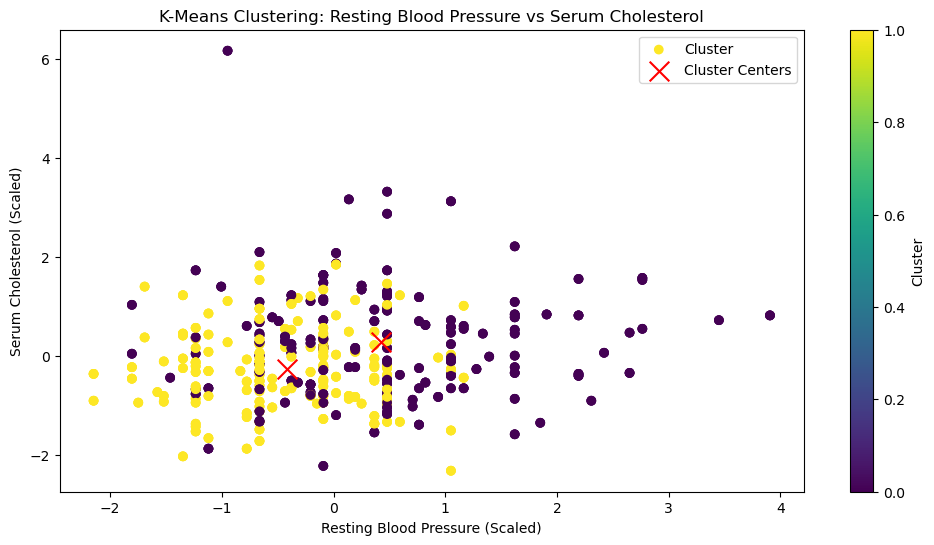

In [9]:
# Plot Resting Blood Pressure vs. Serum Cholesterol
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Resting Blood Pressure (Scaled)')
plt.ylabel('Serum Cholesterol (Scaled)')
plt.title('K-Means Clustering: Resting Blood Pressure vs Serum Cholesterol')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

This is the first pairing where the clusters are not separated by these variables. Note how this is also the only plot without age as variable

#### Resting Blood Pressure vs. Maximum Heart Rate Achieved

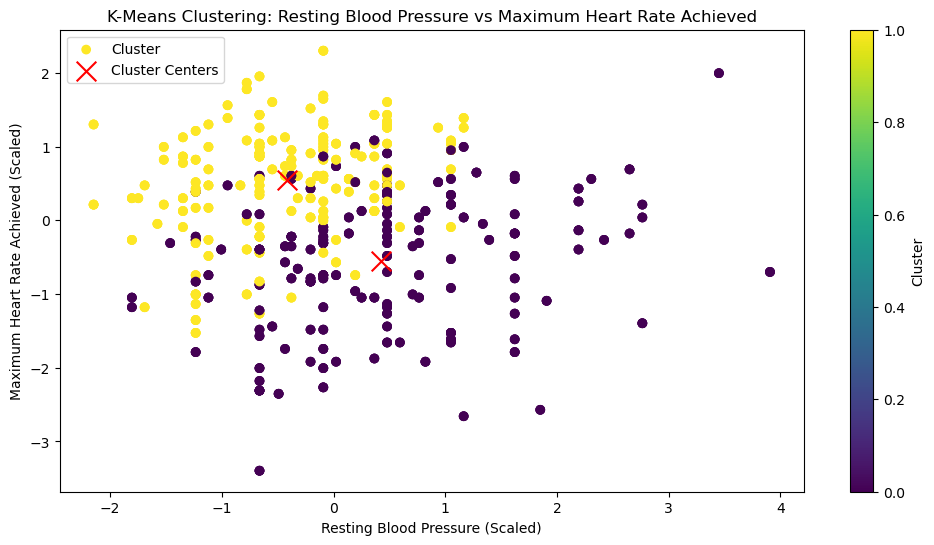

In [10]:
# Plot Resting Blood Pressure vs. Maximum Heart Rate Achieved
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 3], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Resting Blood Pressure (Scaled)')
plt.ylabel('Maximum Heart Rate Achieved (Scaled)')
plt.title('K-Means Clustering: Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

#clusters not well separated by variables

#### Serum Cholesterol vs. Maximum Heart Rate Achieved

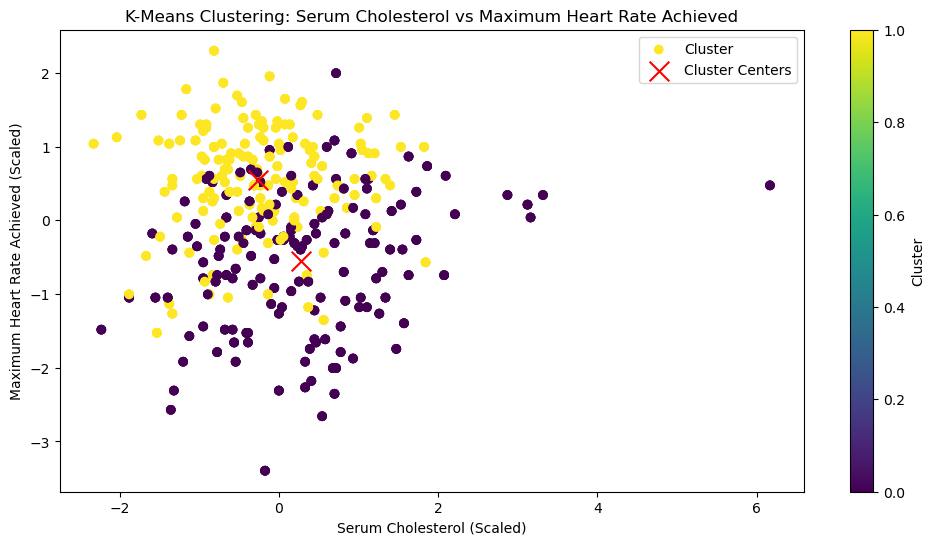

In [11]:
# Plot Serum Cholesterol vs. Maximum Heart Rate Achieved
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=cluster_labels, cmap='viridis', label='Cluster')
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Serum Cholesterol (Scaled)')
plt.ylabel('Maximum Heart Rate Achieved (Scaled)')
plt.title('K-Means Clustering: Serum Cholesterol vs Maximum Heart Rate Achieved')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

#clusters show some separation, but not to the extent found in aging.

#### From the visualizations, it is evident that **age plays a significant role in driving the clusters**. When plotting for each variable, and colouring by clusters, we can see that every plot with the age variable involved has the clusters will separated. This suggests that age is a primary variable influencing the clustering of the heart disease data.

### Dependencies

Make sure to install the required dependencies before running this notebook. You can do this by using the requirements.txt file provided.

- pandas==1.5.0
- scikit-learn==1.2.0
- matplotlib==3.6.0